<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<h1 style="padding: 10px;
              color:white;">

              H&M Data Visualization
</h1>
</div>

<h1 style="background-color:blue;>If you find this notebook helpful please upvote it</h1>

<h1 style="color:blue">If you find this notebook helpful please upvote it</h1>

***

<h4 style="color:purple;">In this competitions H&M wants you to build a personalize fashion recommendation system because they have huge number of products on their online platform But with too many choices, customers might not quickly find what interests them or what they are looking for, and ultimately, they might not make a purchase. To enhance the shopping experience.</h4>

***

# Dataset

<ol style="color:purple;"><li><h4>images/ - a folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the article_id; note, not all article_id values have a corresponding image.</h4></li>
    <li><h4>articles.csv - detailed metadata for each article_id available for purchase</h4></li>
    <li><h4>customers.csv - metadata for each customer_id in dataset</h4></li>
    <li><h4>sample_submission.csv - a sample submission file in the correct format</h4></li>
<li><h4>transactions_train.csv - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.</h4></li><ol>

***

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [2]:
IMG_DIR="../input/h-and-m-personalized-fashion-recommendations/images"

In [3]:
# Reading all the csv files
articles=pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/articles.csv")
customers=pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/customers.csv")
transactions=pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
sample_submission=pd.read_csv("../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv")

<h4 style="color:blue;">Let's display first few rows of all the dataframes</h4>

In [4]:
articles.head(2)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [5]:
customers.head(2)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.000000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.000000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...


In [6]:
transactions.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2


<h1 style="color:purple;">Data Visualization</h1>

In [7]:
# Let's find out the shapes of all three dataframes
shape=pd.DataFrame({"Row":[articles.shape[0],customers.shape[0],transactions.shape[0]],
             "Column":[articles.shape[1],customers.shape[1],transactions.shape[1]]},index=['articles',
                                                                                          'customers','transactions'])
green = [{'selector': 'th', 'props': 'background-color: green'}]
red = [{'selector': 'th', 'props': 'background-color: red'}]
shape.style.set_table_styles({"articles": green, "customers": red, "transactions": green}, axis=1)

,Row,Column
articles,105542,25
customers,1371980,7
transactions,31788324,5


In [8]:
import missingno as msno

<h3 style="color:purple;">Visualization of missing values</h3>

<AxesSubplot:>

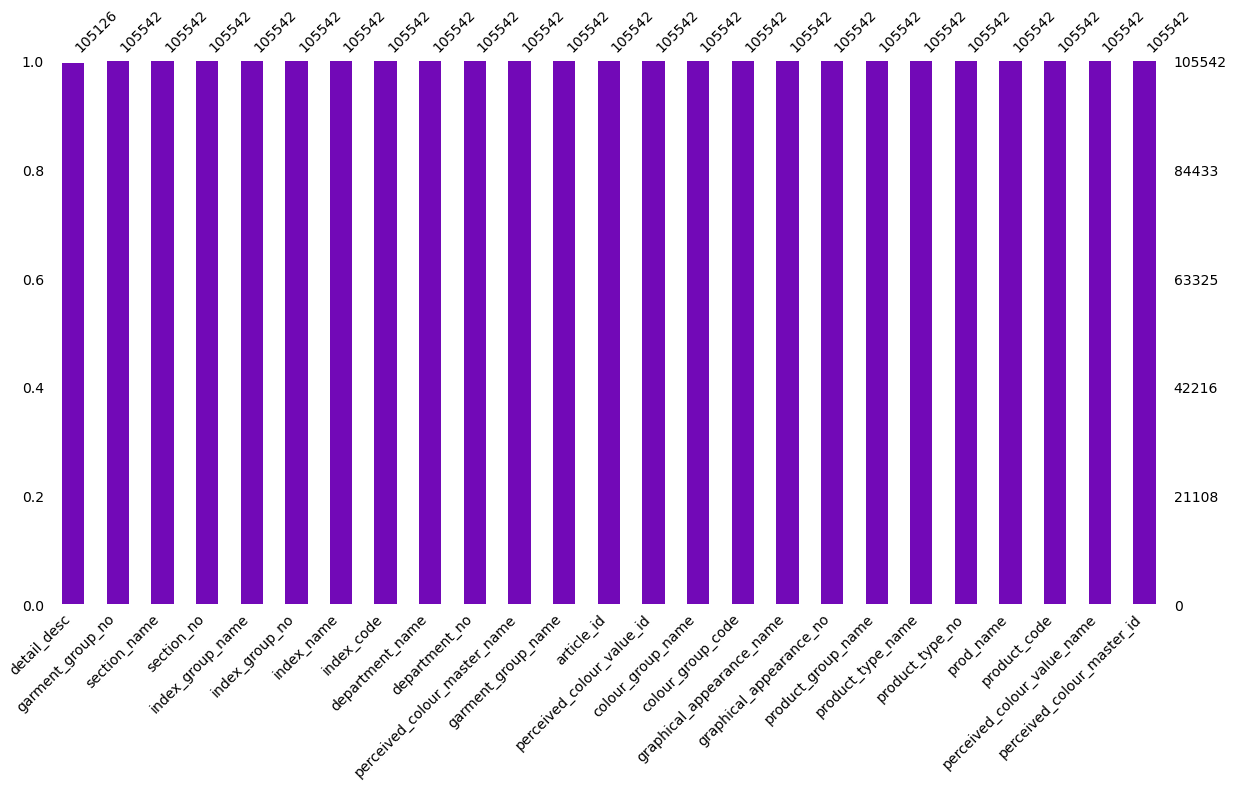

In [9]:
msno.bar(articles,sort='ascending',color='#7209b7',figsize=(20,10),fontsize=14)

### detail_desc column has very few missing values

<AxesSubplot:>

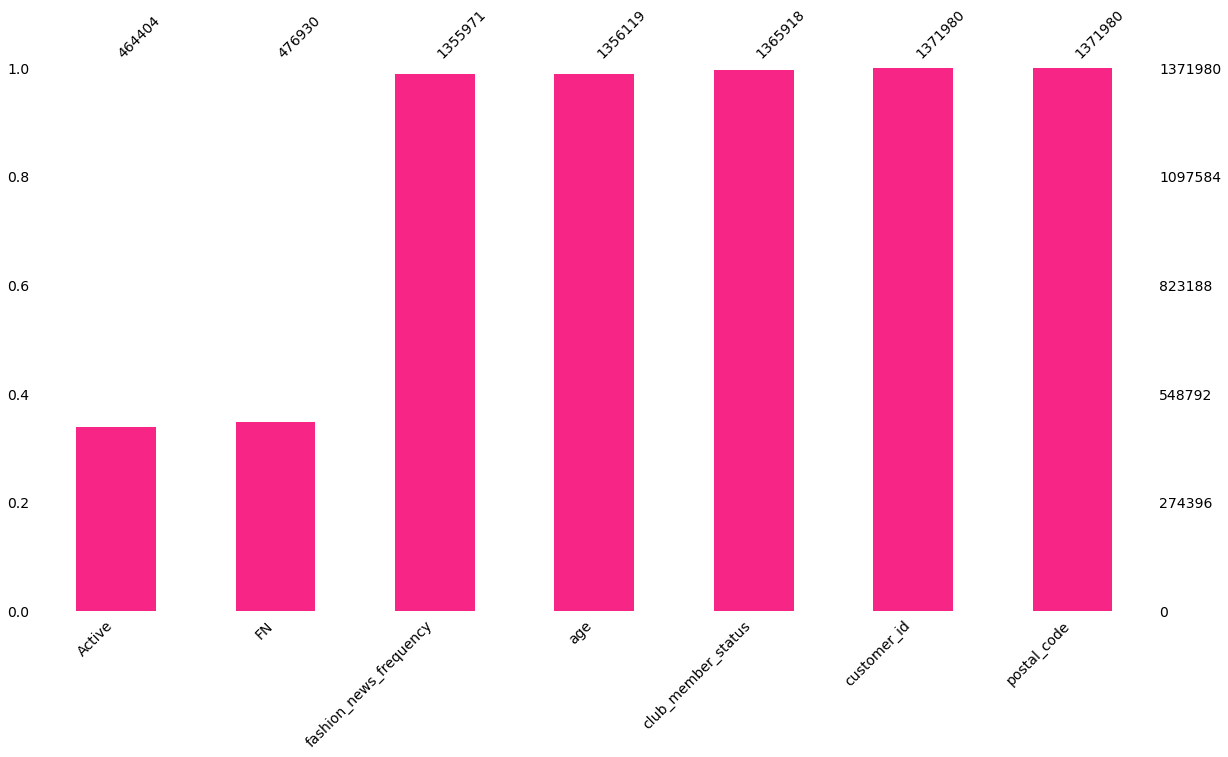

In [10]:
msno.bar(customers,color='#f72585',sort='ascending',figsize=(20,10),fontsize=14)

### In Active and FN column of customers dataset has more than 60% null values  

<AxesSubplot:>

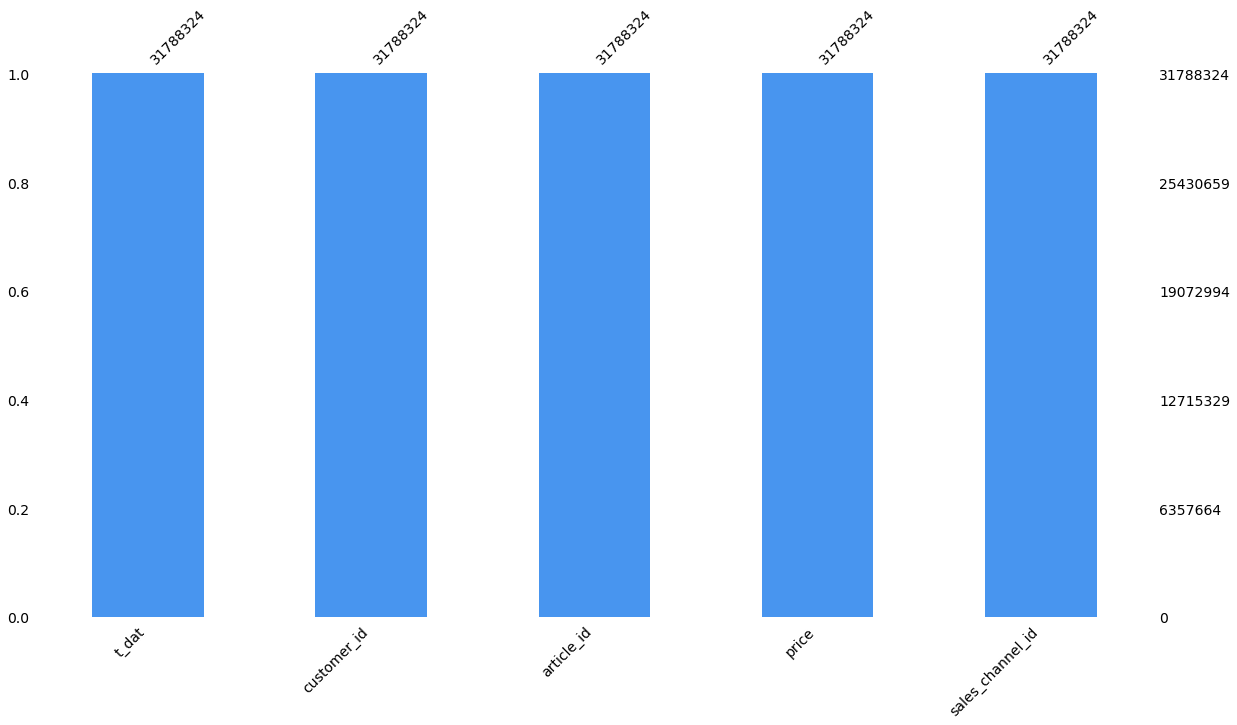

In [11]:
msno.bar(transactions,color='#4895ef',sort='ascending',figsize=(20,10),fontsize=14)

### Transactions dataset does not have any null value as all

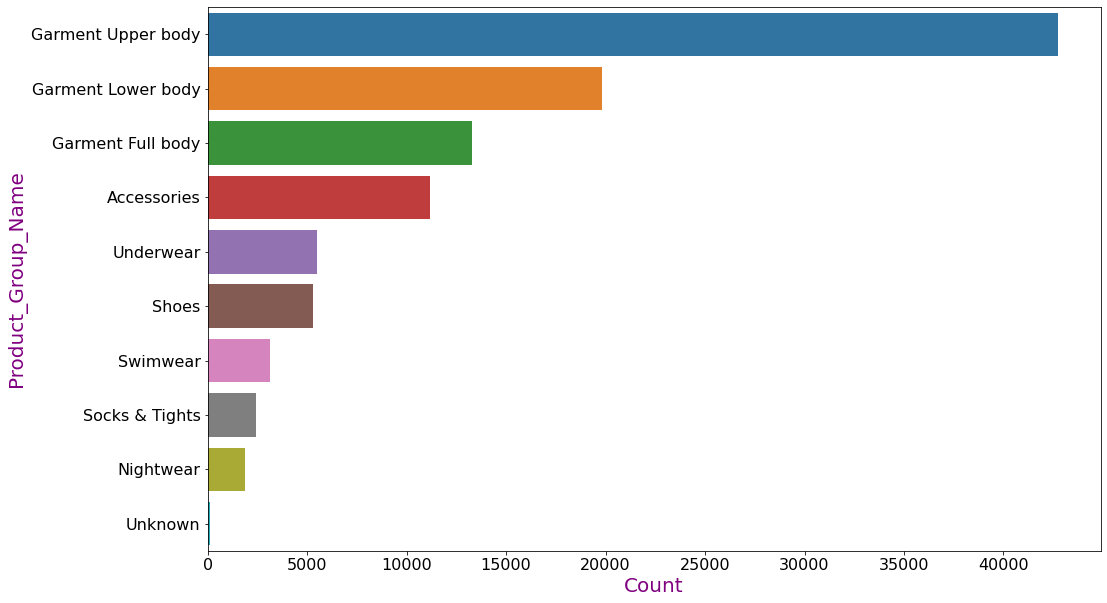

In [12]:
plt.figure(figsize=(16,10))
sns.countplot(y='product_group_name',data=articles,order=articles['product_group_name'].value_counts().index[:10])
#plt.title("Product Group Name",font='serif',size=20,color="purple")
plt.xlabel("Count",size=20,color="purple")
plt.ylabel("Product_Group_Name",size=20,color="purple")
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

### These are the 10 most frequent product group name.Garment Upper body is by far the most appeared product group name

In [13]:
articles.product_group_name.value_counts()/len(articles)*100

Garment Upper body      40.496674
Garment Lower body      18.771674
Garment Full body       12.594038
Accessories             10.572095
Underwear                5.201721
Shoes                    5.005590
Swimwear                 2.962802
Socks & Tights           2.313771
Nightwear                1.799284
Unknown                  0.114646
Underwear/nightwear      0.051164
Cosmetic                 0.046427
Bags                     0.023687
Items                    0.016107
Furniture                0.012317
Garment and Shoe care    0.008527
Stationery               0.004737
Interior textile         0.002842
Fun                      0.001895
Name: product_group_name, dtype: float64

### So [Garment Upper body, Garment Lower body, Garment Full body, Accessories] have more than 80% share in all group names

In [14]:
# First two digits of article_id showing the directroy number, So i am creating a new column
# by taking these digits it will help us to create the paths of images while image visualization.

articles['dir'] = articles.article_id.astype(str).str[:2].astype(int)

In [15]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,dir
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,10
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,10
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,10
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",11
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",11


<h3 style="color:purple">article_id from the articles dataset is same as image id from the image folder
Here i am trying to access the article_id corresponding to the particular product_group_name for instance article_id corresponding to the shoes product_group_name and trying to visualiza them.</h3>

In [16]:
def get_article_id(df,group_name):
    article_id=df[df['product_group_name']==group_name]
    article_id['article_id']="0"+article_id['article_id'].astype(str)
    article_id['dir']="0"+article_id['dir'].astype(str)
    return article_id[['article_id','dir']].reset_index(drop=True)



def read_img(data):
    li=[]
    for i in range(10):
        arti=data['article_id'][i]
        di=data['dir'][i]
        im=cv2.imread("../input/h-and-m-personalized-fashion-recommendations/images/"+di+"/"+arti+".jpg")
        im=cv2.resize(im,(224,224),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        li.append(im)
    return li


def show_img(data):
    f, axarr = plt.subplots(1,5,figsize=(15,10)) 
    axarr[0].imshow(data[0])
    axarr[1].imshow(data[1])
    axarr[2].imshow(data[2])
    axarr[3].imshow(data[3])
    axarr[4].imshow(data[4])
    f.tight_layout()
    
def call(df,group_name):
    _id=get_article_id(df,group_name)
    img=read_img(_id)
    display_img=show_img(img)
    return display_img



    

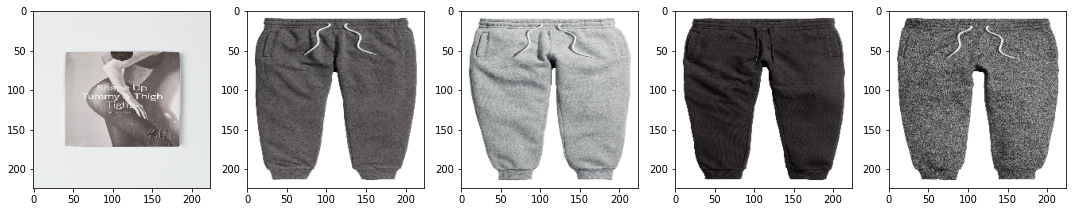

In [17]:
call(articles,"Garment Lower body")

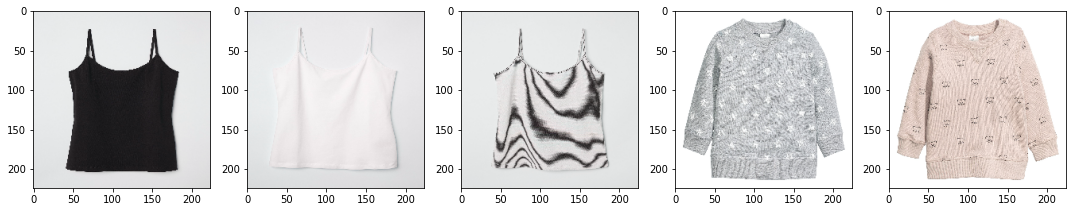

In [18]:
call(articles,"Garment Upper body")

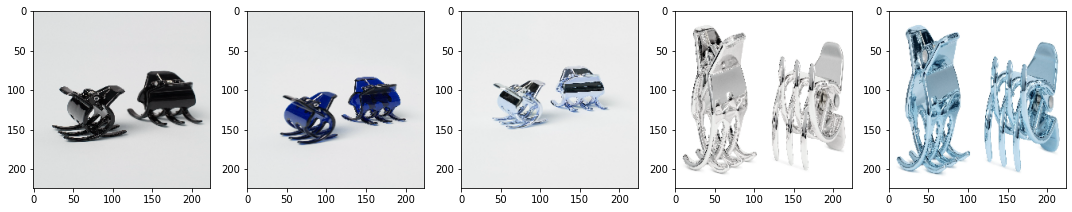

In [19]:
call(articles,"Accessories")

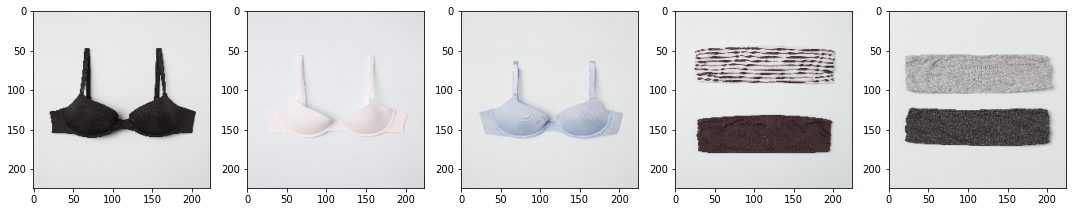

In [20]:
call(articles,"Underwear")

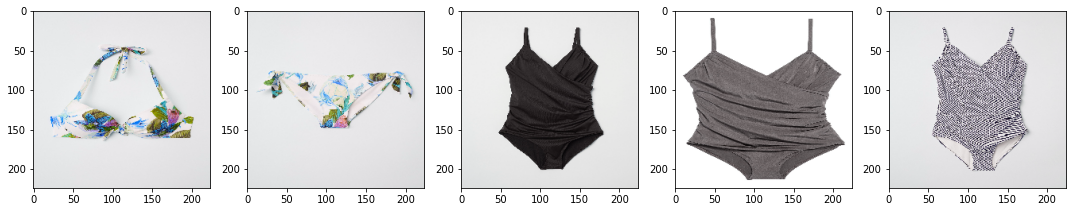

In [21]:
call(articles,"Swimwear")

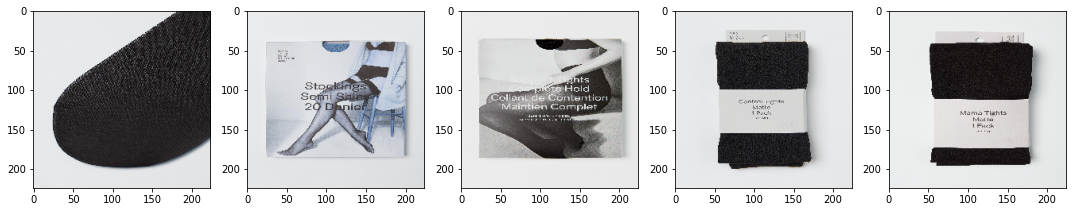

In [22]:
call(articles,"Socks & Tights")

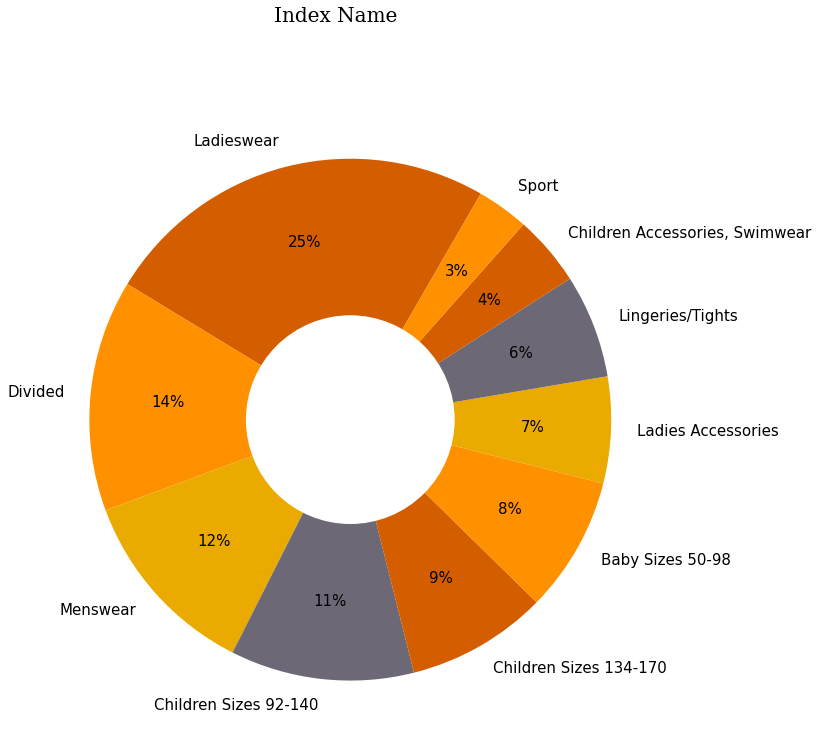

In [23]:
# Percent share in Index name column 

fig, ax  = plt.subplots(figsize=(16, 12))
fig.suptitle('Index Name', size = 20, font="Serif")
#explode = (0.05, 0.05, 0.05, 0.05)
labels = list(articles.index_name.value_counts().index)
sizes =articles.index_name.value_counts().values
ax.pie(sizes,startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.7, colors=["#d45d00","#ff9100","#eaaa00","#6d6875"],textprops={"fontsize":15})
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

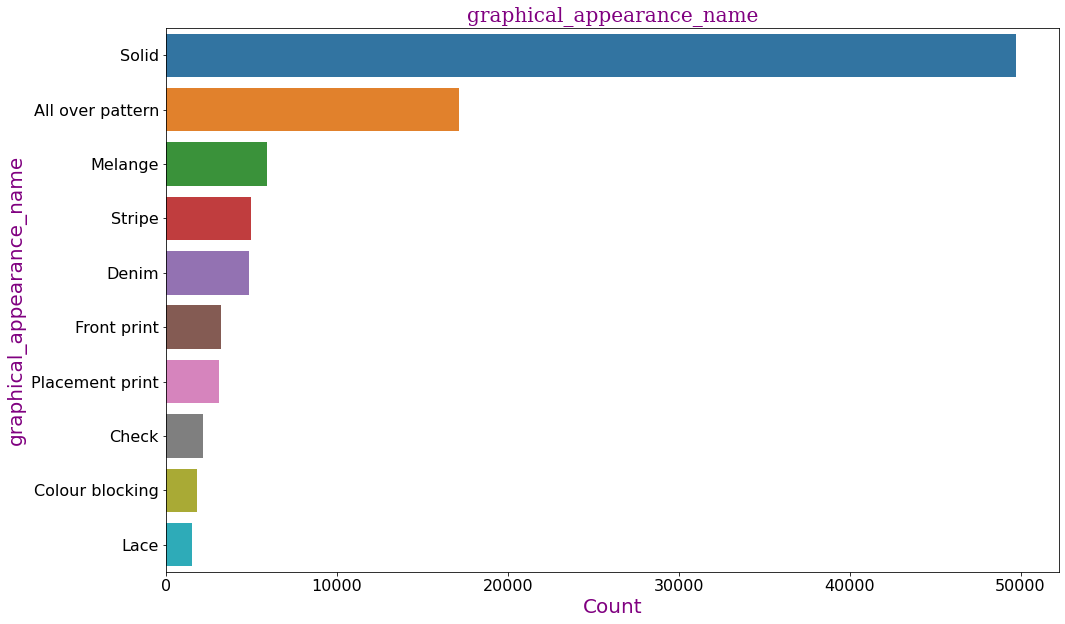

In [24]:
# visualization of Graphical apperance name 

plt.figure(figsize=(16,10))
sns.countplot(y='graphical_appearance_name',data=articles,order=articles['graphical_appearance_name'].value_counts().index[:10])
plt.title("graphical_appearance_name",font='serif',size=20,color="purple")
plt.xlabel("Count",size=20,color="purple")
plt.ylabel("graphical_appearance_name",size=20,color="purple")
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

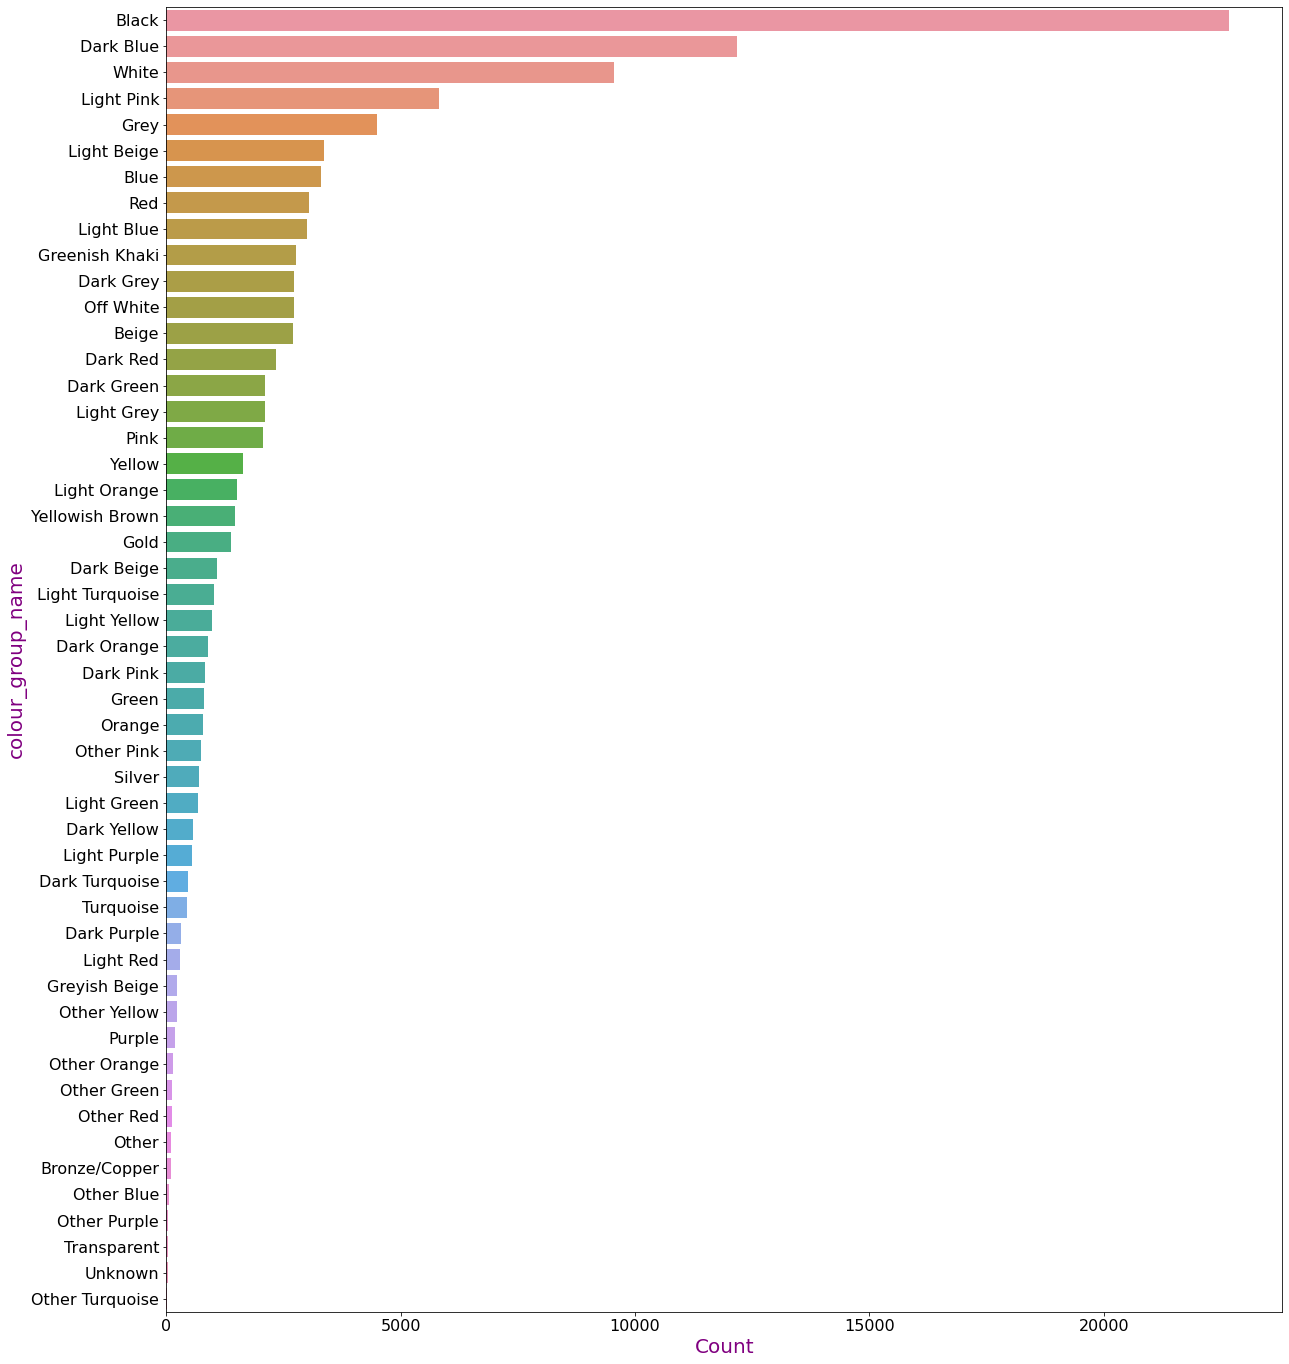

In [25]:
# Visualization of color_group_name 

plt.figure(figsize=(20,24))
sns.countplot(y='colour_group_name',data=articles,order=articles['colour_group_name'].value_counts().index)
#plt.title("graphical_appearance_name",font='serif',size=20,color="purple")
plt.xlabel("Count",size=20,color="purple")
plt.ylabel("colour_group_name",size=20,color="purple")
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

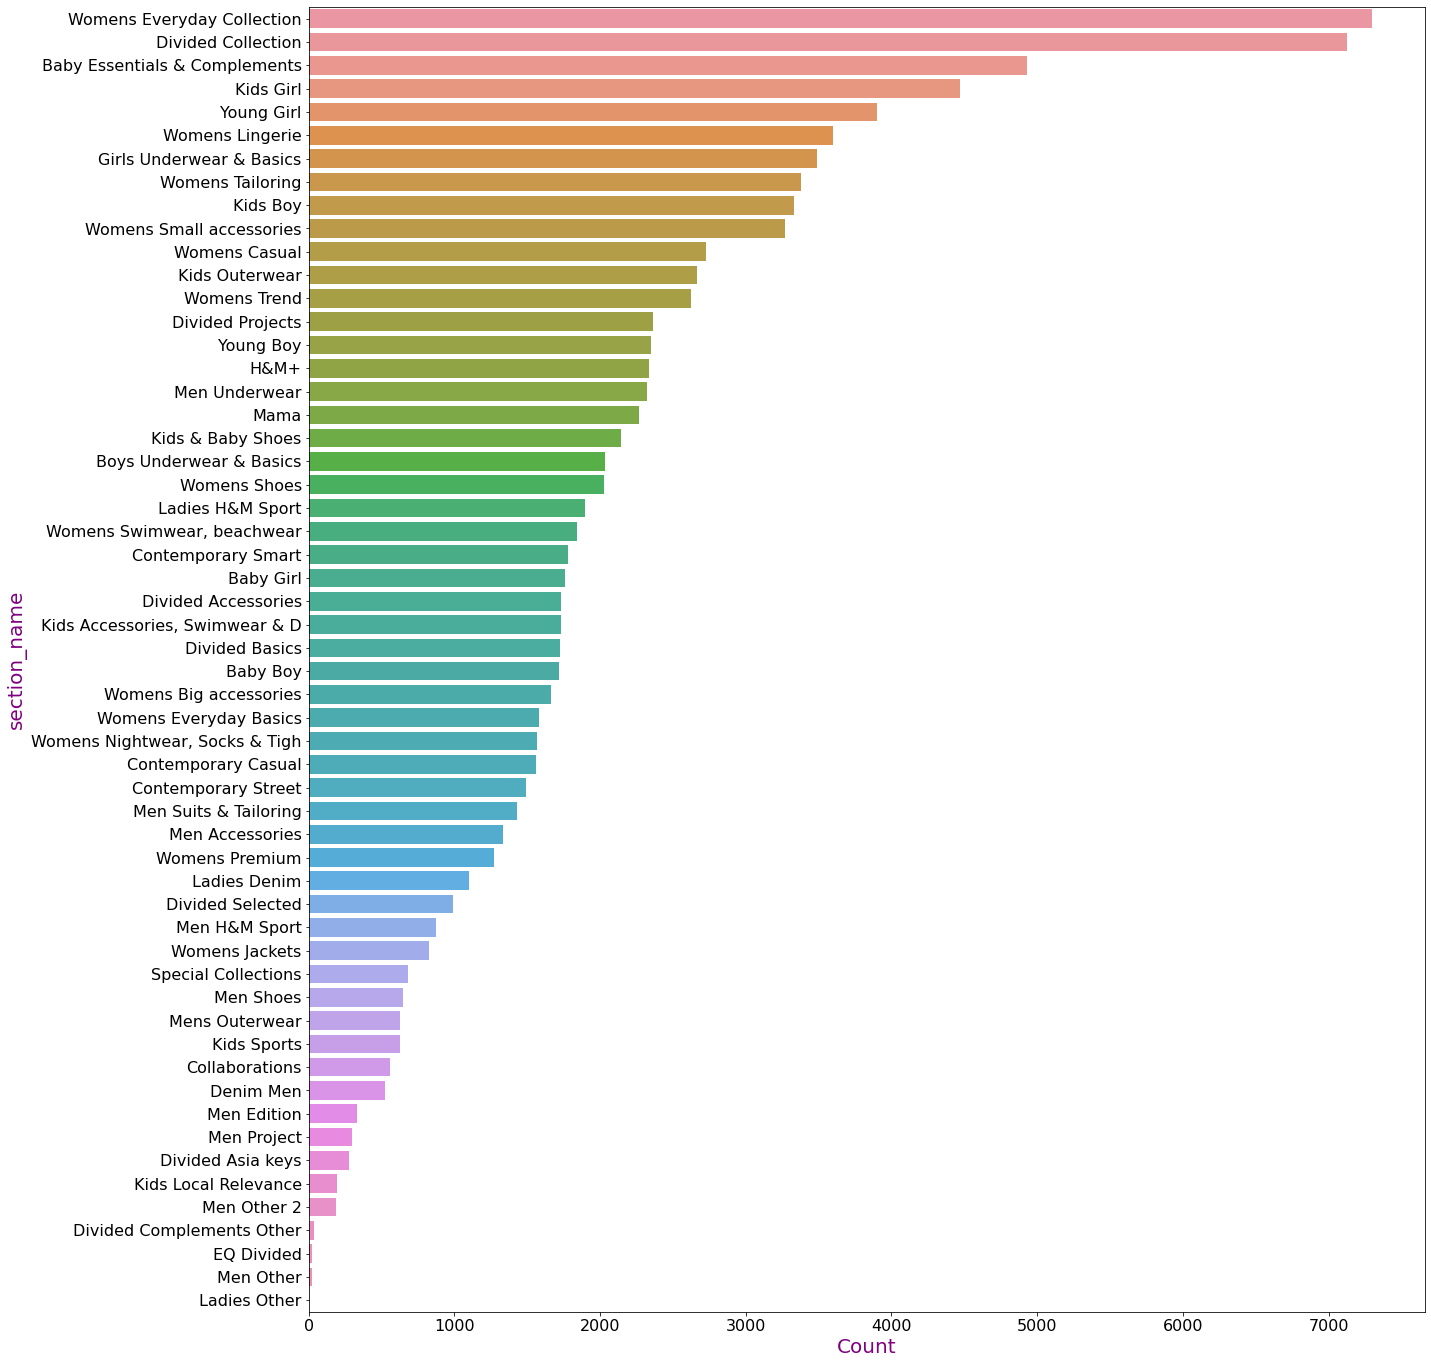

In [26]:
plt.figure(figsize=(20,24))
sns.countplot(y='section_name',data=articles,order=articles['section_name'].value_counts().index)
#plt.title("graphical_appearance_name",font='serif',size=20,color="purple")
plt.xlabel("Count",size=20,color="purple")
plt.ylabel("section_name",size=20,color="purple")
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

In [27]:
from wordcloud import WordCloud, STOPWORDS

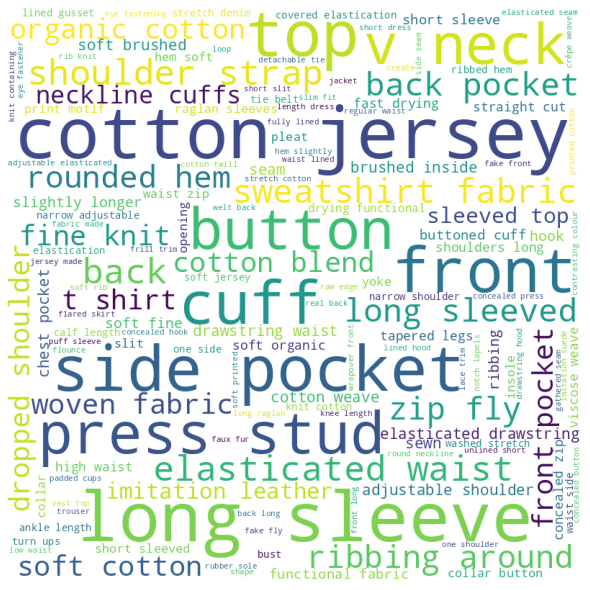

In [28]:
stopwords = set(STOPWORDS)

comment_words = ''
 
# iterate through the csv file
for val in articles.detail_desc:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Visualization of text data from detail_desc column.
### The size of each word indicates its frequency or importance

In [29]:
customers.club_member_status.value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

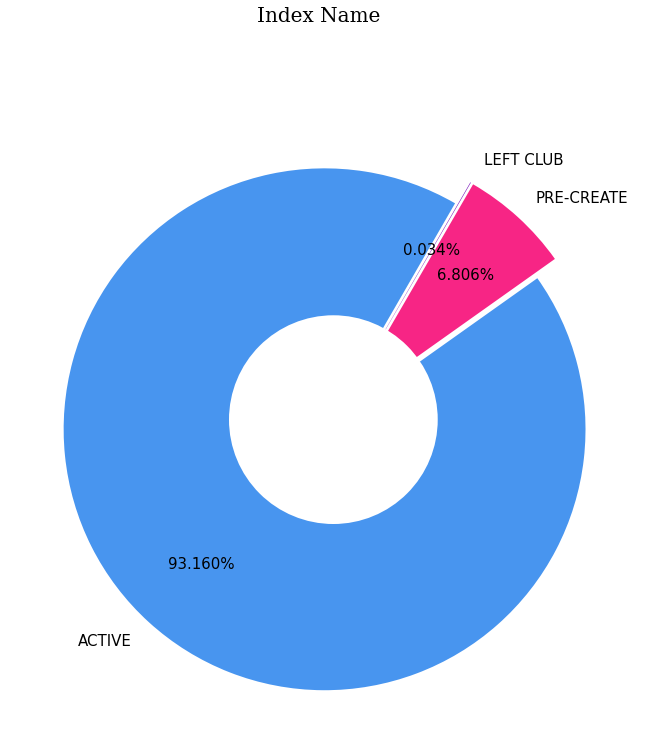

In [30]:
fig, ax  = plt.subplots(figsize=(16, 12))
fig.suptitle('Index Name', size = 20, font="Serif")
explode = (0.05, 0.05, 0.05)
labels = list(customers.club_member_status.value_counts().index)
sizes =customers.club_member_status.value_counts().values
ax.pie(sizes,explode=explode,startangle=60, labels=labels,autopct='%1.3f%%', pctdistance=0.7, colors=["#4895ef","#f72585","#7209b7"],textprops={"fontsize":15})
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

In [31]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.000000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.000000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.000000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.000000,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.000000,1.000000,ACTIVE,Regularly,52.000000,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [32]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [33]:
transactions.sales_channel_id.value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

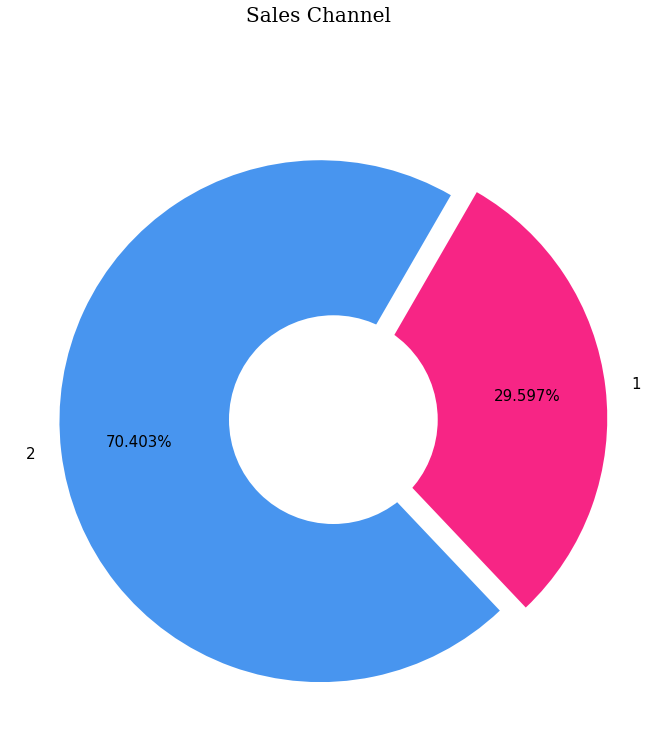

In [34]:
fig, ax  = plt.subplots(figsize=(16, 12))
fig.suptitle('Sales Channel', size = 20, font="Serif")
explode = (0.05, 0.05)
labels = list(transactions.sales_channel_id.value_counts().index)
sizes =transactions.sales_channel_id.value_counts().values
ax.pie(sizes,explode=explode,startangle=60, labels=labels,autopct='%1.3f%%', pctdistance=0.7, colors=["#4895ef","#f72585","#7209b7"],textprops={"fontsize":15})
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

<center><h1 style="color:red;">Work in Progress</h1></center>